*AGEC 652 - Spring 2023*
# Structural estimation of a multi-agent model
## Discrete choice within Nash-Bertrand competition

## Agenda

We will return to the discrete choice model between car models A and B (from weekly problems) only this time without knowing the model parameters!

- You will estimate demand and supply models jointly using GMM
- Using estimated parameters, you will predict marginal costs
- Then, using marginal costs, you will quantify market power in this industry

## Research problem

Question: **How much market power do car brands A and B have?**

We have data from a random sample from $N=300$ local markets (indexed by $j$) for car models A and B
- Shares: $s_k$
- Prices: $p_k$
- Local steel prices: $t_k$
- Average local labor costs: $l_i$

We want to estimate the mean Lerner index for each firm
$$L_k = \frac{1}{N} \sum_{j=1}^N \frac{p_{k,j} - c_{k,j}}{p_{k,j}}$$

## Demand: theoretical model

In a given market, consumers have 3 options: 
- Buy one car of model a with price $p_a$
- Buy one car of model b with price $p_b$
- Not to buy a car, i.e., the outside option

If consumer $i$ buys car $k$, they get utility

$$u_{i,k} = \beta_0 -\alpha p_k + \beta_1 B^D_k + \beta_2 \xi^D_k + \nu_{ik} \equiv V_k + \nu_{ik}$$

where 
- $\alpha$ and $\beta$s are model parameters
- $B^D_k$ is a vector of **observed** product characteristics that consumers care about
- $\xi^D_k$ is a vector of **unobserved** product characteristics that consumers care about
- $\nu_{ik}$ is the (mean zero) idiosyncratic taste of consumer $i$ for product $k$
- $V_{k}$ is the mean utility for product $k$

If they do not buy a car, they get zero utility. Consumers are utility maximizers, so they pick the option that yields the highest utility.

## Demand: theoretical model

Assuming $\nu_{ik}$ is distributed in the population following a [Type I Extreme Value distribution](https://en.wikipedia.org/wiki/Gumbel_distribution), we can derive a closed-form expression for expected market shares of products a and b:

$$s_{a}=\frac{e^{V_a}}{1+e^{V_a}+e^{V_b}}, \; s_{b}=\frac{e^{V_b}}{1+e^{V_a}+e^{V_b}}$$

The demand for the outside option is given by $s_0 = 1 - s_A - s_B = \frac{1}{1+e^{V_a}+e^{V_b}}$

**Useful trick**. Note that $\frac{s_k}{s_0} = e^{V_k}$. Take logs on both sides:
$$\log(s_k)-\log(s_0) = V_k$$

## Demand: statistical model

$$\log(s_k)-\log(s_0) = V_k$$

The expression above refers to expected shares and does not fit the data exactly. For this reason, we add a idiosyncratic demand shock $\epsilon^D_{k,j}$ to obtain 

$$\log(s_{k,j})-\log(s_{0,j}) = V_{k,j} + \epsilon_{k,j} = \beta_0 -\alpha p_{k,j} + \beta_1 B^D_{k,j} + \beta_2 \xi^D_{k,j} + \epsilon^D_{k,j} \quad (1)$$

We assume $\epsilon^D_{k,j}$ has mean zero and is uncorrelated with $p_{k,j}$, $B^D_{k,j}$, and $\xi^D_{k,j}$

## Supply: theoretical model
Since this market is a duopoly, firms anticipate that their pricing decisions affect their demands mutually
- Firms then choose the price that maximizes their expected profits given the price their competitor has chosen: Bertrand competition

We assume that the outcome of this process is a Nash equilibrium: firms do the best they can given what others are doing and no firm has an incentive to unilaterally deviate
- Hence, each market is in a Nash-Bertrand equilibrium

Let $c_{k}$ be the constant marginal cost. Then in each market each firm solves:
$$\max_{p_{k}} \pi(p_k, p_{-k}) = p_{k} s_k(p_k, p_{-k}) - c_{k} s_k(p_k, p_{-k})$$  
The first-order condition is

$$
\partial\pi_k/\partial p_k = 0 \Rightarrow s_k(p_k, p_{-k}) + (p_k - c_k) \frac{\partial s_k(p_k, p_{-k})}{\partial p_k} = 0
$$

## Supply: theoretical model

Using the closed-form expression for the derivative $\frac{\partial s_k(p_k, p_{-k})}{\partial p_k} = -\alpha s_k (1-s_k)$, it follows that

$$
s_k(p_k, p_{-k}) - \alpha(p_k - c_k)s_k(p_k, p_{-k})(1-s_k(p_k, p_{-k})) = 0\\
c_k = p_k - \frac{1}{\alpha(1-s_k)}
$$

Thus, given parameter $\alpha$, we can calculate marginal costs that rationalize equilibrium prices and shares

## Supply: statistical model

With parameter estimate $\hat{\alpha}$ and using the expression for rationalized marginal costs based on the FOC, we can write predict expected marginal costs

$$
\hat{c}_{k,j} = p_{k,j} - \frac{1}{\hat{\alpha}(1-s_{k,j})} \quad (2)
$$

We parameterize marginal cost using observable input costs and add an idiosyncratic cost shock $\epsilon^S_{k,j}$ to accomodate for differences from the expectation
$$\hat{c}_{k,j} = \gamma_0 + \gamma_1 B^S_{k,j} + \gamma_2 t_{k,j} + \gamma_3 l_{k,j} + \gamma_4 \xi^S_k +\epsilon^S_{k,j} \quad (3)$$

where
- $\gamma$ s are parameters to be estimated
- $t_{k,j}$ and $l_{k,j}$ are local input costs for steel and labor
- $B^S_k$ is a vector of **observed** product characteristics that affect costs
- $\xi^S_k$ is a vector of **unobserved** product characteristics that affect costs

We assume $\epsilon^S_{k,j}$ to be uncorrelated with$t_{k,j}$, $l_{k,j}$, $B^S_{k,j}$, and $\xi^S_k$

## Estimation: demand moment conditions

$$\log(s_{k,j})-\log(s_{0,j}) = \beta_0 -\alpha p_{k,j} + \beta_1 B^D_{k,j} + \beta_2 \xi^D_{k,j} + \epsilon^D_{k,j} \quad (1)$$

Do we have a problem to estimate this equation?

Very likely, YES! Unobserved product characteristics affect willingness to pay: $E[p_{k,j}\xi^D_{k,j}] \neq 0$

Since we can't include $\xi^D_{k,j}$, we have that $E[p_{k,j}(\beta_2 \xi^D_{k,j} + \epsilon^D_{k,j})] \neq 0 \Rightarrow$ ENDOGENEITY!

How can we solve this?

**With instruments**
- We can use input costs $t_{k,j}, l_{k,j}$ to instrument for price
- Key idea: with fixed product characteristics, higher costs lead to higher prices without affecting demand

## Estimation: demand moment conditions
So, we rewrite the demand estimating equation as

$$\log(s_{k,j})-\log(s_{0,j}) = \beta_0 -\alpha p_{k,j} + \beta_1 B^D_{k,j} + \epsilon^D_{k,j} = X^D_{k,j} \theta^D + \epsilon^D_{k,j} \quad (4)$$

where 
- $\theta^D$ is the parameter column vector $[\beta_0 \; -\alpha \; \beta_1]^T$
- $X^D$ is the row vector $[1 \; p_{k,j} \; B^D_{k,j}]$, with $B^D_{k,j}$ being a dummy variable receiving 1 for product b ($k=b$) or 0 otherwise
    - $B^D_{k,j}$ will pick up all the perceived product characteristics that are constant across markets


Denote the instrument vector $Z_{k,j} = [1 \; B^D_{k,j} \; t_{k,j} \; l_{k,j} ]$. Then, we can form moment conditions
$$E\left[Z^T_{k,j}\epsilon^D_{k,j}\right] = 0$$

Q: How many moment conditions do we have here?

## Estimation: demand moment conditions

A: We have **four moment** conditions from the demand side

$$
E\left[\epsilon^D_{k,j}\right] = 0\\
E\left[B^D_{k,j}\epsilon^D_{k,j}\right] = 0\\
E\left[t_{k,j}\epsilon^D_{k,j}\right] = 0\\
E\left[l_{k,j}\epsilon^D_{k,j}\right] = 0
$$

## Estimation: supply moment conditions

$$\hat{c}_{k,j} = \gamma_0 + \gamma_1 B^S_{k,j} + \gamma_2 t_{k,j} + \gamma_3 l_{k,j} + \gamma_4 \xi^S_k +\epsilon^S_{k,j} \quad (3)$$

Again, we have unobserved characteristics that affect cost. However, endogeneity is less of a concern here if we consider this sector to be a small part of the economy:
- Prices for steel and labor clear on much bigger markets, thus decisions of product characteristics are unlikely to affect their prices

For this reason, we can more reasonably assume that $E[t_{k,j}\epsilon^S_{k,j}]=0$, $E[l_{k,j}\epsilon^S_{k,j}]=0$, and $E[B^S_{k,j}\epsilon^S_{k,j}]=0$

## Estimation: supply moment conditions

So we rewrite our supply estimating equation as

$$\hat{c}_{k,j} = \gamma_0 + \gamma_1 B^S_{k,j} + \gamma_2 t_{k,j} + \gamma_3 l_{k,j} + \epsilon^S_{k,j} = \theta^S X^S_{k,j} + \epsilon^S_{k,j} \quad (5)$$

where 
- $\theta^S$ is the parameter column vector $[\gamma_0 \; \gamma_1 \; \gamma_2 \; \gamma_3]^T$
- $X^S$ is the row vector $[1 \; B^S_{k,j} \;t_{k,j} \;l_{k,j}]$, with $B^S_{k,j}$ being a dummy variable receiving 1 for product b ($k=b$) or 0 otherwise

Since $X^S$ are instruments for themselves (and note that $X^S_{k,j} = Z_{k,j}$, we can construct supply moment conditions
$$E\left[Z^T_{k,j}\epsilon^S_{k,j}\right] = 0$$

Q: How many moment conditions do we have here?

## Estimation: demand moment conditions

A: Again, we have **four moment** conditions, now from the supply side

$$
E\left[\epsilon^S_{k,j}\right] = 0\\
E\left[B^S_{k,j}\epsilon^S_{k,j}\right] = 0\\
E\left[t_{k,j}\epsilon^S_{k,j}\right] = 0\\
E\left[l_{k,j}\epsilon^S_{k,j}\right] = 0
$$

## Your turn!

Enough talk, let's work! The data for this exercise are in file `shares_data.csv`

1. Using these 8 moment conditions, joinly estimate parameter vector $\theta = [\theta^D, \theta^S]$ with GMM
2. Using your estimate $\hat{\alpha}$, predict marginal costs (equation 2) and calculate the average Lerner index for each model: $\hat{L}_k = \frac{1}{N} \sum_{j=1}^N \frac{p_{k,j} - \hat{c}_{k,j}}{p_{k,j}}$

Here are a few steps to get you started

## Loading and preparing the data

In [1]:
using DataFrames, CSV
df = CSV.read("shares_data.csv", DataFrame)

,MarketID,s_k,p_k,s_0,steel,labor,product
,Int64,Float64,Float64,Float64,Float64,Float64,String1
1,1,0.0485396,33.96,0.878173,8.95,20.68,a
2,1,0.0732874,33.53,0.878173,8.95,20.68,b
3,2,0.0492018,34.06,0.866904,8.45,22.02,a
4,2,0.0838941,33.18,0.866904,8.45,22.02,b
5,3,0.0566908,33.2689,0.850551,7.43,21.96,a
6,3,0.0927581,33.6889,0.850551,7.43,21.96,b
7,4,0.0590058,33.8089,0.858772,7.93,21.73,a
8,4,0.0822226,33.5989,0.858772,7.93,21.73,b
9,5,0.0742836,31.94,0.831041,7.61,21.9,a


## Loading and preparing the data

This data set already includes $s_0$ calculated for you. Let's get $N$ and generate
- $log(s_{k,j}) - log(s_{0,j})$
- $B_{k,j}$

In [2]:
N = nrow(df)
df.logsk_logs0 = log.(df.s_k) - log.(df.s_0);
df.is_B = (df.product .== "b");
df

,MarketID,s_k,p_k,s_0,steel,labor,product,logsk_logs0
,Int64,Float64,Float64,Float64,Float64,Float64,String1,Float64
1,1,0.0485396,33.96,0.878173,8.95,20.68,a,-2.89546
2,1,0.0732874,33.53,0.878173,8.95,20.68,b,-2.48346
3,2,0.0492018,34.06,0.866904,8.45,22.02,a,-2.869
4,2,0.0838941,33.18,0.866904,8.45,22.02,b,-2.33537
5,3,0.0566908,33.2689,0.850551,7.43,21.96,a,-2.70827
6,3,0.0927581,33.6889,0.850551,7.43,21.96,b,-2.21589
7,4,0.0590058,33.8089,0.858772,7.93,21.73,a,-2.67787
8,4,0.0822226,33.5989,0.858772,7.93,21.73,b,-2.34607
9,5,0.0742836,31.94,0.831041,7.61,21.9,a,-2.41479


## Loading and preparing the data

It might also be useful to prepare matrices $X$ and $Z$

In [3]:
X = [ones(N) df.p_k df.is_B];
Z = [ones(N) df.is_B df.steel df.labor];

## Moment conditions function

Program function `g_i(theta)` that receives parameter vector $\theta$ and returns the eight moment conditions for all observations ($N \times 8$ matrix). Here is a way to structure it

In [4]:
function g_i(theta::AbstractVector{T}) where T
    # DEMAND SIDE
    theta_d = theta[1:3] # demand parameters
    # Epsilons for demand side
    e_d = df.logsk_logs0 - (X * theta_d) 
    # Moment conditions for demand side
    # REPLACE THIS LINE <m_di = ... >

    # SUPPLY SIDE
    # Costs
    alpha = -theta[2] # we need it to estimate marginal costs
    c_k = df.p_k - 1/alpha .* 1 ./(1 .- df.s_k)

    theta_s = theta[4:7] # supply parameters
    # Epsilons for supply side
    e_s = c_k - (Z * theta_s)
    # Moment conditions for supply side
    # # REPLACE THIS LINE <m_si = ...>
  
    # Return matrices side by side (N x M)
    return([m_di m_si])
end

g_i (generic function with 1 method)

## GMM estimation

With function `g_i(theta)`, you can use `Optim` package to minimize objective function `Q(theta)` 

In [5]:
using LinearAlgebra
M = 8
W = I(M) # Identity Matrix
function Q(theta)
    # Get moment vectors
    m_i = g_i(theta)
    # Take means of each column
    G = [sum(m_i[:, k]) for k in 1:M] ./ N
    # Calculate Q    
    # REPLACE THIS LINE <...> 
end

Q (generic function with 1 method)

## GMM estimation
- For the first step, use $W$ as the identity matrix and find estimate `theta_1`
- For the second step, $\hat{W}=(\hat{S})^{-1}$. So, you will need to calculate 
$$\hat{S} = E[g_i(\hat{\theta}_1)^T g_i(\hat{\theta}_1)]$$

## GMM estimation: initial guess

Given the dimensionality of the problem it's a good idea to start with a reasonable initial guess 
- Let's use OLS to get an initial guess for $\theta^D$
- Let's guess $\gamma_0$ as the minimum price and set 0.1 for the other parameters (we expect them to be positive)

In [6]:
using GLM
ols_reg = lm(@formula(logsk_logs0 ~ 1 + p_k + is_B), df)
theta_0 = [coef(ols_reg); minimum(df.p_k); ones(3)./10]

7-element Vector{Float64}:
  0.31506305791962314
 -0.0928458769023904
  0.3630065729084741
 30.53116385673067
  0.1
  0.1
  0.1

## GMM estimation: first step

In [7]:
# Step 1
using Optim
res = Optim.optimize(Q, theta_0, Newton(), Optim.Options(f_abstol=1e-10, g_abstol=0.0, g_reltol=0.0))
theta_1 =  res.minimizer

7-element Vector{Float64}:
  1.3167934612005487
 -0.1228198715837184
  0.3726111117323415
  6.90249208813232
  0.15417544082557208
  0.9851256773142594
  0.45457665443993567

In [8]:
# Calculate W_hat
# REPLACE THIS LINE <W = inv(... >

8×8 Matrix{Float64}:
 22262.9       -9.34389   -315.713     …  -40.593     -1.72596    22.5192
    -9.34389  139.505       -6.33642       -5.44452    0.276477    0.435557
  -315.713     -6.33642     34.9919         1.64377   -0.623417    0.197342
  -893.464     -0.556555     1.81941        1.24632    0.298785   -1.09934
  -472.364    -11.7318       0.257378       2.28337   -5.31538   -29.8727
   -40.593     -5.44452      1.64377   …    5.88747   -0.14891    -0.166385
    -1.72596    0.276477    -0.623417      -0.14891    1.2495     -0.185561
    22.5192     0.435557     0.197342      -0.166385  -0.185561    1.4342

## GMM estimation: second step

In [9]:
# Use step 1 estimates as initial guess
res = Optim.optimize(Q, theta_1, Newton(), Optim.Options(f_abstol=1e-10, g_abstol=0.0, g_reltol=0.0))
theta_GMM =  res.minimizer

7-element Vector{Float64}:
  1.0199256974273108
 -0.11397815604348306
  0.3710074786956938
  6.290279356119901
  0.14020424544797908
  0.9924727694197776
  0.4493242201423294

## GMM estimation: standard errors
Recall 
$$Var(\hat{\theta}_{GMM}) = \frac{1}{N}(\hat{D}^\prime \hat{S}^{-1} \hat{D})^{-1}$$
where:
- $\hat{D} = E\left[\frac{\partial g_i(z_i; \hat{\theta})}{\partial \hat{\theta}^\prime}\right]$
- $\hat{S} = E\left[g_i(z_i; \hat{\theta}) g_i(z_i;\hat{\theta})^\prime\right]$

To calculate $\hat{D}$, it will be useful to define function `Eg` for $E[g_i(z_i; \hat{\theta}]$

In [24]:
function Eg(theta_GMM)
    gi = g_i(theta_GMM)
    Eg = [sum(gi[:, k]) for k in 1:M] ./ N; # This take means of each column
    return Eg
end;

## GMM estimation: standard errors
So we calculate
- $\hat{D} = E\left[\frac{\partial g_i(z_i; \hat{\theta})}{\partial \hat{\theta}^\prime}\right]$
- $\hat{S} = E\left[g_i(z_i; \hat{\theta}) g_i(z_i;\hat{\theta})^\prime\right]$
- $Var(\hat{\theta}_{GMM}) = \frac{1}{N}(\hat{D}^\prime \hat{S}^{-1} \hat{D})^{-1}$

In [ ]:
using ForwardDiff
D_GMM = ForwardDiff.jacobian(Eg, theta_GMM);
S_GMM = g_i(theta_GMM)'  * g_i(theta_GMM) ./N;
V_GMM = inv(D_GMM' * inv(S_GMM) * D_GMM) ./N

7×7 Matrix{Float64}:
  0.0636808    -0.00190122    0.000430357  …  -0.00155039   -0.000665075
 -0.00190122    5.68441e-5   -1.56312e-5       4.65384e-5    2.00545e-5
  0.000430357  -1.56312e-5    0.000206462     -6.79124e-5   -4.0683e-5
  0.181612     -0.00543615    0.00274163      -0.0302212    -0.0483084
  0.00562975   -0.000167422   0.000175138      0.000148558   0.000160716
 -0.00155039    4.65384e-5   -6.79124e-5   …   0.00209994    0.000403963
 -0.000665075   2.00545e-5   -4.0683e-5        0.000403963   0.00195862

## GMM estimation: standard errors

Having the estimated variance-covariance matrix $\hat{V}$, we can easily calculate the standard errors of our estimates and 95% confidence intervals

In [33]:
SE_GMM = sqrt.(diag(V_GMM));
[theta_GMM SE_GMM (theta_GMM-1.96*SE_GMM) (theta_GMM+1.96*SE_GMM)]

7×4 Matrix{Float64}:
  1.01993   0.252351    0.525319     1.51453
 -0.113978  0.0075395  -0.128756    -0.0992007
  0.371007  0.0143688   0.342845     0.39917
  6.29028   1.32785     3.68769      8.89287
  0.140204  0.0741099  -0.00505119   0.28546
  0.992473  0.0458251   0.902656     1.08229
  0.449324  0.0442563   0.362582     0.536067

## Marginal cost estimation
Now that we have estimated all model parameters, we can pick $\alpha$ to calculate implied marginal costs

In [10]:
alpha_hat = -theta_GMM[2]
df.c_k = df.p_k - 1/alpha_hat .* 1 ./(1 .- df.s_k)

600-element Vector{Float64}:
 24.738795623135914
 24.062544181471655
 24.832373516777842
 23.60292920868719
 23.96804478334333
 24.01828910485132
 24.48508967353134
 24.039228021894246
 22.46235534622872
 23.228883020499666
  ⋮
 24.4522919411026
 24.9708247087463
 24.684056116326747
 23.57304222168553
 23.753233362550105
 23.03024376005476
 23.29227139103517
 23.255258601242673
 23.956042729733415

## Marginal cost estimation
Let's take a look at the distribution of costs per firm

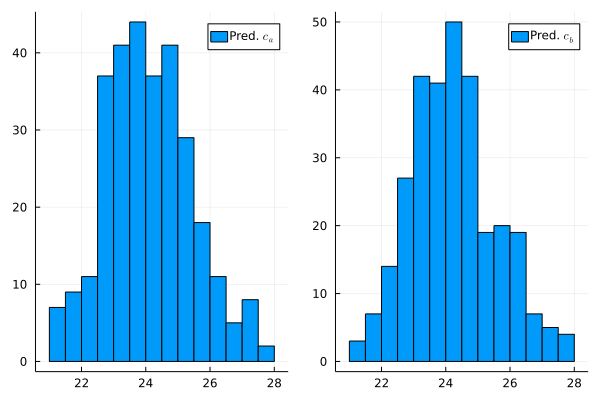

In [12]:
using Plots, LaTeXStrings
plot(histogram(df.c_k[.!df.is_B], label=L"Pred. $c_a$", bins=30), histogram(df.c_k[df.is_B], label=L"Pred. $c_b$", bins=30))

## Lerner index
We are now ready to calculate the average Lerner index per firm

In [13]:
df.lerner_k = (df.p_k - df.c_k) ./ df.p_k;
# Firm A
sum(df.lerner_k[.!df.is_B])./(N/2)

0.2785174838631413

In [14]:
# Firm B
sum(df.lerner_k[df.is_B])./(N/2)

0.2818733881583978

So about 28% of the price is due to market power
- Firm B has slightly higher market power due to its perceived higher quality ($\beta_1 = 0.37 > 0$)